<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [5]:
## Write your code here

# calculate missing values to check if it is okay to drop the empty rows or imputation should be done 
print(f"Missing values in 'Employment': {df["Employment"].isnull().sum()}")
print(f"Missing values in 'JobSat': {df["JobSat"].isnull().sum()}")
print(f"Missing values in 'RemoteWork': {df["RemoteWork"].isnull().sum()}")
print(f"Missing values in 'YearsCodePro': {df["YearsCodePro"].isnull().sum()}")

Missing values in 'Employment': 0
Missing values in 'JobSat': 36311
Missing values in 'RemoteWork': 10631
Missing values in 'YearsCodePro': 13827


In [6]:
print(f"Value counts in 'JobSat': \n{df["JobSat"].value_counts()}")
print(f"Value counts in 'RemoteWork': \n{df["RemoteWork"].value_counts()}")
print(f"Value counts in 'YearsCodePro': \n{df["YearsCodePro"].value_counts()}")

Value counts in 'JobSat': 
JobSat
8.0     7509
7.0     6379
6.0     3751
9.0     3626
10.0    2251
5.0     1956
3.0     1165
4.0     1130
2.0      772
0.0      311
1.0      276
Name: count, dtype: int64
Value counts in 'RemoteWork': 
RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64
Value counts in 'YearsCodePro': 
YearsCodePro
2                     4168
3                     4093
5                     3526
10                    3251
4                     3215
Less than 1 year      2856
6                     2843
1                     2639
8                     2549
7                     2517
12                    1777
15                    1635
20                    1549
9                     1493
11                    1312
13                    1127
14                    1082
25                     998
16                     946
18                     867
17   

In [7]:
# Imputing 'RemoteWork' with the most frequent value
most_freq = df["RemoteWork"].value_counts().idxmax()

df["RemoteWork"] = df["RemoteWork"].fillna(most_freq)

# There is no empty value in 'Employment'

# Drop empty rows in JobSat and YearsCodePro (critical columns) for analysis
df_clean = df.dropna(subset=["JobSat", "YearsCodePro"])


In [ ]:
# After dropping and imputation, number of missing rows
print(f"Missing values in 'Employment': {df_clean["Employment"].isnull().sum()}")
print(f"Missing values in 'JobSat': {df_clean["JobSat"].isnull().sum()}")
print(f"Missing values in 'RemoteWork': {df_clean["RemoteWork"].isnull().sum()}")
print(f"Missing values in 'YearsCodePro': {df_clean["YearsCodePro"].isnull().sum()}")

Missing values in 'Employment': 0
Missing values in 'JobSat': 0
Missing values in 'RemoteWork': 0
Missing values in 'YearsCodePro': 0


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [15]:
## Write your code here
# Define bins (intervals) for categorizing the data
df_clean["YearsCodePro"] = df_clean["YearsCodePro"].replace("Less than 1 year",0).replace("More than 50 years", 55)
df_clean["YearsCodePro"] = pd.to_numeric(df_clean["YearsCodePro"], errors='coerce')

bins = [0, 5, 10, 20, float('inf')]  #The bins list specifies the edges of the intervals that we want to categorize the data into.

# Define labels corresponding to the bins
labels=['0-5 years', '5-10 years', '10-15 years', '15-20 years', '20+ years']

# Create new column 'ExperienceRange' by categorizing YearsCodePro using bins and labels
df_clean["ExperienceRange"] = pd.cut(df_clean["YearsCodePro"], bins=bins, labels=labels, right=False)

df_clean["ExperienceRange"].value_counts()

C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_4796\1373427187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["YearsCodePro"] = df_clean["YearsCodePro"].replace("Less than 1 year",0).replace("More than 50 years", 55)
C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_4796\1373427187.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["YearsCodePro"] = pd.to_numeric(df_clean["YearsCodePro"], errors='coerce')
C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_4796\1373427187.py:12: 

ExperienceRange
0-5 years      8233
5-10 years     7835
10-15 years    5167
20+ years      4290
15-20 years    2831
Name: count, dtype: int64

In [16]:
median_JobSat = df_clean.groupby("ExperienceRange")["JobSat"].median()
median_JobSat

C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_4796\1874854436.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_JobSat = df_clean.groupby("ExperienceRange")["JobSat"].median()


ExperienceRange
0-5 years      7.0
5-10 years     7.0
10-15 years    7.0
15-20 years    8.0
20+ years      8.0
Name: JobSat, dtype: float64

C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_4796\1869277360.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_JobSat.index, y=median_JobSat.values, palette='viridis')


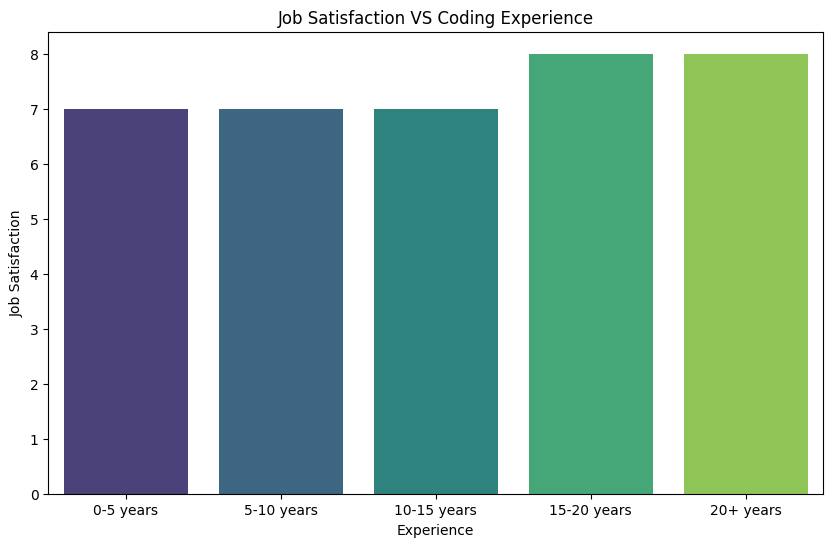

In [23]:
# create bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=median_JobSat.index, y=median_JobSat.values, palette='viridis')
plt.title("Job Satisfaction VS Coding Experience")
plt.xlabel("Experience")
plt.ylabel("Job Satisfaction")
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_4796\2874191947.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clean["JobSat"], palette='viridis')


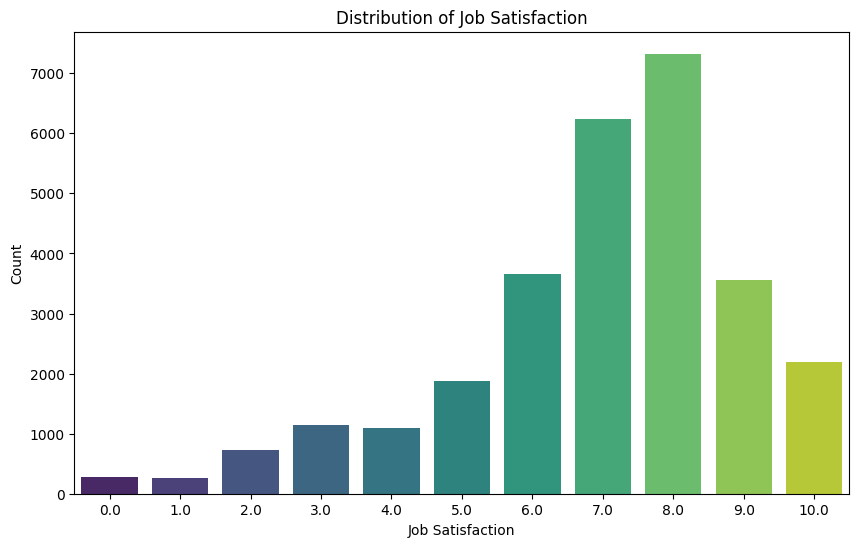

In [24]:
## Write your code here
plt.figure(figsize=(10,6))
sns.countplot(x=df_clean["JobSat"], palette='viridis')
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')

# Show the plot
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_4796\134990566.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_clean["RemoteWork"], palette='viridis')


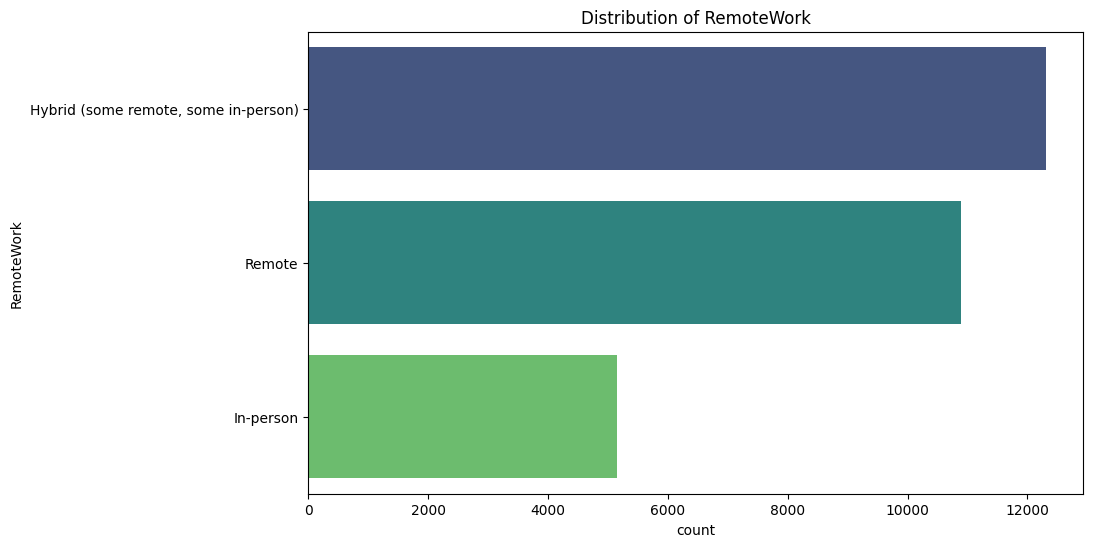

In [27]:
## Write your code here
# Count plot for RemoteWork distribution
plt.figure(figsize=(10,6))
sns.countplot(df_clean["RemoteWork"], palette='viridis')
plt.title("Distribution of RemoteWork")
#plt.xlabel("Count")
#plt.ylabel("RemoteWork Preference")
plt.show()

RemoteWork                                                            Hybrid (some remote, some in-person)  \
Employment                             DevType                                                               
Employed, full-time                    Academic researcher                                             156   
                                       Blockchain                                                       10   
                                       Cloud infrastructure engineer                                   116   
                                       Data engineer                                                   270   
                                       Data or business analyst                                         87   
...                                                                                                    ...   
Student, part-time;Employed, part-time Scientist                                                         1   
          

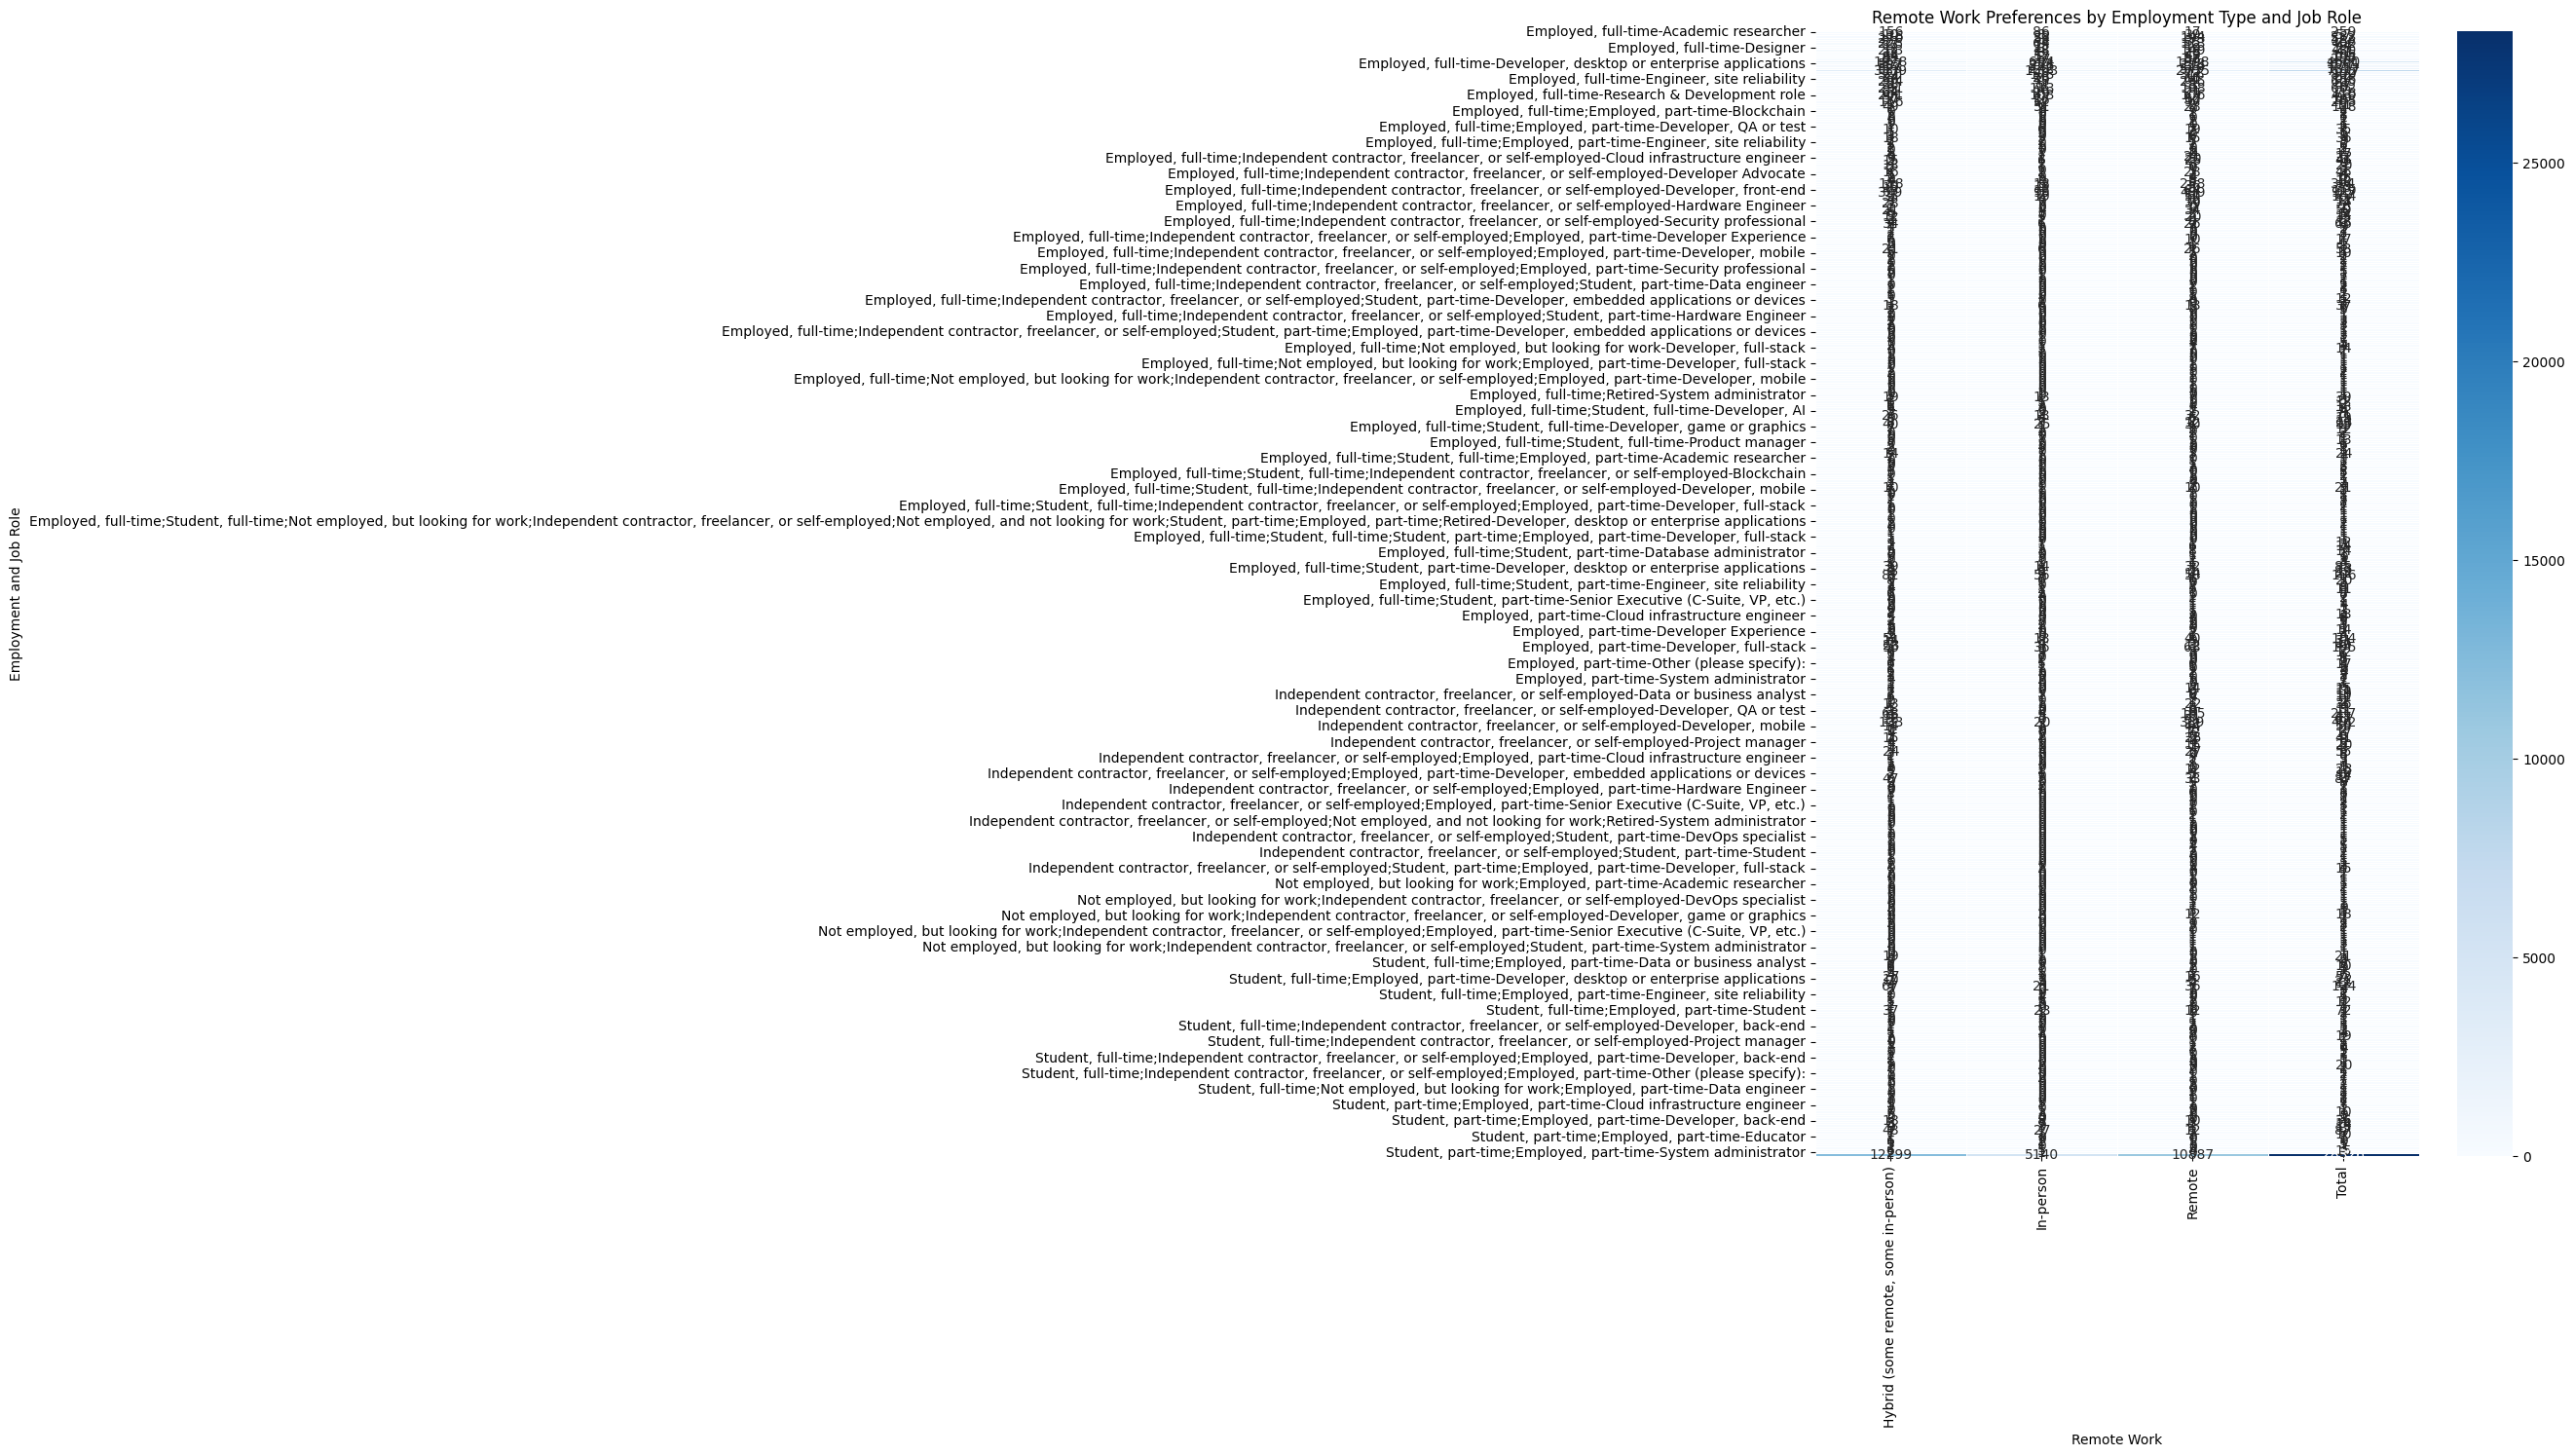

In [37]:
cross_tab = pd.crosstab(index=[df_clean["Employment"], df["DevType"]], columns=[df["RemoteWork"]], margins=True, margins_name="Total")
print(cross_tab)

# Visualizing the cross-tabulation using a heatmap
plt.figure(figsize=(10, 15))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.title('Remote Work Preferences by Employment Type and Job Role')
plt.xlabel('Remote Work')
plt.ylabel('Employment and Job Role')
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [56]:
## Write your code here
# **1. Convert the "LanguageHaveWorkedWith" column into separate binary columns**
language_dummies = df_clean['LanguageHaveWorkedWith'].str.get_dummies(sep=';')
# **2. Group by country and sum the language counts**
language_counts = df_clean[['Country']].join(language_dummies).groupby('Country').sum()
language_counts


,Ada,Apex,Assembly,Bash/Shell (all shells),C,C#,C++,Clojure,Cobol,Crystal,Dart,Delphi,Elixir,Erlang,F#,Fortran,GDScript,Go,Groovy,HTML/CSS,Haskell,Java,JavaScript,Julia,Kotlin,Lisp,Lua,MATLAB,MicroPython,Nim,OCaml,Objective-C,PHP,Perl,PowerShell,Prolog,Python,R,Ruby,Rust,SQL,Scala,Solidity,Swift,TypeScript,VBA,Visual Basic (.Net),Zephyr,Zig
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2,1,1,3,2,2,3,1,1,2,4,1,1,1,1,1,2,1,2,11,1,2,10,1,2,1,1,2,2,1,1,1,8,1,2,1,9,1,1,1,9,1,1,1,7,3,1,2,1
Albania,0,0,1,3,3,4,1,0,0,0,0,1,0,0,0,0,0,0,0,10,0,6,11,0,1,0,0,1,0,0,0,1,6,0,2,0,2,0,0,0,8,0,0,0,5,0,0,0,0
Algeria,1,0,1,2,1,3,0,0,0,0,4,2,0,0,0,0,0,0,0,15,0,3,14,0,2,0,0,0,0,0,0,0,7,1,1,0,11,0,0,0,12,0,0,1,10,1,0,0,1
Andorra,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0
Angola,2,1,1,2,1,2,0,1,0,0,2,1,0,0,0,1,0,0,0,3,0,2,3,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, Bolivarian Republic of...",0,0,1,8,4,9,6,0,0,0,1,2,1,1,1,1,1,2,1,23,0,8,28,0,2,0,4,2,0,0,0,0,13,0,5,0,9,1,1,1,18,1,0,1,13,3,4,0,0
Viet Nam,0,0,6,32,24,32,30,1,1,0,10,0,2,0,0,0,1,21,7,65,1,55,84,0,15,1,8,7,1,0,0,5,22,2,18,0,54,6,5,12,66,4,2,9,61,4,0,0,1
Yemen,0,0,0,0,1,1,1,0,0,0,2,0,0,0,0,0,0,0,0,2,0,1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,2,0,1,0,0


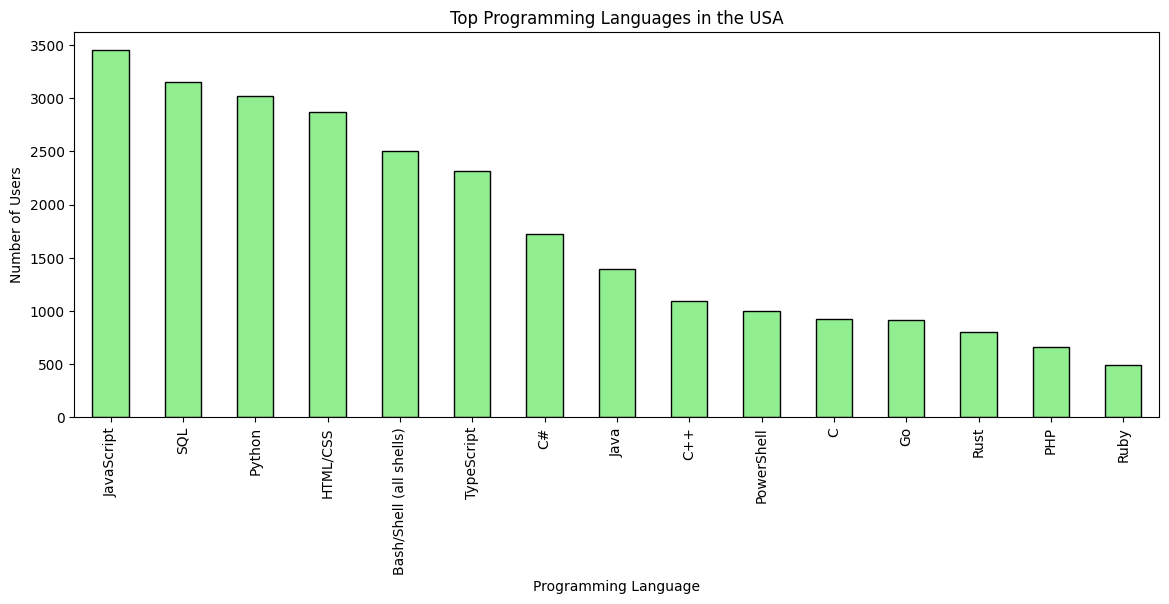

In [57]:
# **3. Bar Plot for One Country (e.g., USA)**
top_15_lang = language_counts.loc['United States of America'].sort_values(ascending=False)[:15]

plt.figure(figsize=(14, 5))
top_15_lang.plot(kind='bar', color='lightgreen', edgecolor="black")

plt.xlabel("Programming Language")
plt.ylabel("Number of Users")
plt.title("Top Programming Languages in the USA")
plt.xticks(rotation=90)
plt.show()

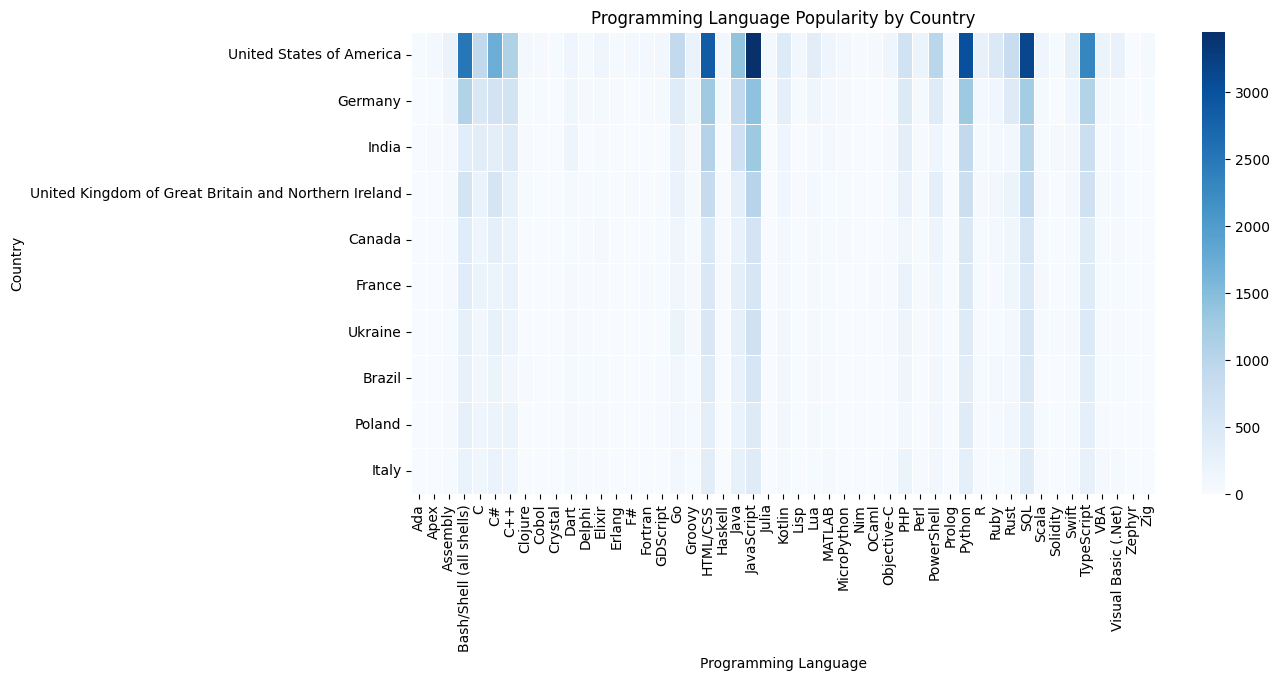

In [58]:
# **4. Heatmap for All Regions**
plt.figure(figsize=(12, 6))
top_countries = language_counts.sum(axis=1).nlargest(10).index  # Top 10 countries
filtered_data = language_counts.loc[top_countries]

sns.heatmap(filtered_data, cmap="Blues", linewidths=0.5)

plt.xlabel("Programming Language")
plt.ylabel("Country")
plt.title("Programming Language Popularity by Country")
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [63]:
correlation = df_clean["YearsCodePro"].corr(df_clean["JobSatPoints_1"])
print(correlation)

-0.03172593696497185


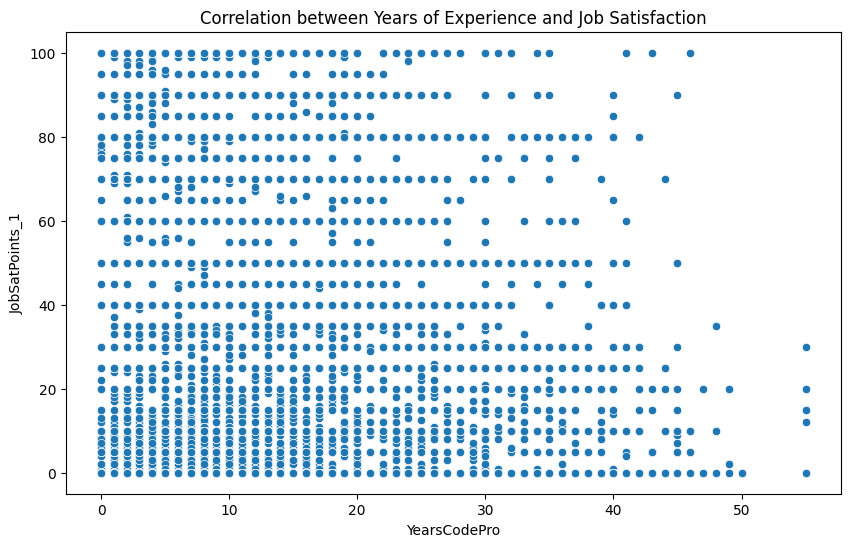

In [61]:
## Write your code here
# Create a scatter plot to examine the correlation between 'YearsCodePro' and 'JobSatPoints_1'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='YearsCodePro', y='JobSatPoints_1')

# Add labels and title
#plt.xlabel('Years of Experience (YearsCodePro)')
#plt.ylabel('Job Satisfaction (JobSatPoints_1)')
plt.title('Correlation between Years of Experience and Job Satisfaction')

# Display the plot
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.

In [66]:
## Write your code here
employment_dummies = df_clean["Employment"].str.get_dummies(sep=';')
employment_count = df_clean[["EdLevel"]].join(employment_dummies).groupby('EdLevel').sum()
employment_count

,"Employed, full-time","Employed, part-time","Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,"Student, full-time","Student, part-time"
EdLevel,,,,,,,,
"Associate degree (A.A., A.S., etc.)",792,58,131,1,2,1,37,48
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11797,681,1679,4,62,3,375,381
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",7401,382,1195,7,32,4,137,161
Primary/elementary school,109,18,28,1,1,1,12,5
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",1245,64,173,1,4,5,13,18
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",1092,264,296,0,16,0,211,94
Some college/university study without earning a degree,2790,291,645,4,13,6,196,192
Something else,249,24,49,1,3,2,10,16


In [69]:
edu_emp_ct = pd.crosstab(df_clean["EdLevel"], df_clean["Employment"],margins=True, margins_name="Total")
edu_emp_ct

Employment,"Employed, full-time","Employed, full-time;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Not employed, and not looking for work","Employed, full-time;Not employed, but looking for work","Employed, full-time;Not employed, but looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Retired","Employed, full-time;Student, full-time","Employed, full-time;Student, full-time;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Student, part-time","Employed, full-time;Student, full-time;Student, part-time","Employed, full-time;Student, full-time;Student, part-time;Employed, part-time","Employed, full-time;Student, part-time","Employed, full-time;Student, part-time;Employed, part-time","Employed, part-time","Employed, part-time;Retired","Independent contractor, freelancer, or self-employed","Independent contractor, freelancer, or self-employed;Employed, part-time","Independent contractor, freelancer, or self-employed;Employed, part-time;Retired","Independent contractor, freelancer, or self-employed;Not employed, and not looking for work","Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Retired","Independent contractor, freelancer, or self-employed;Retired","Independent contractor, freelancer, or self-employed;Student, part-time","Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Not employed, and not looking for work;Employed, part-time","Not employed, but looking for work","Not employed, but looking for work;Employed, part-time","Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-tim

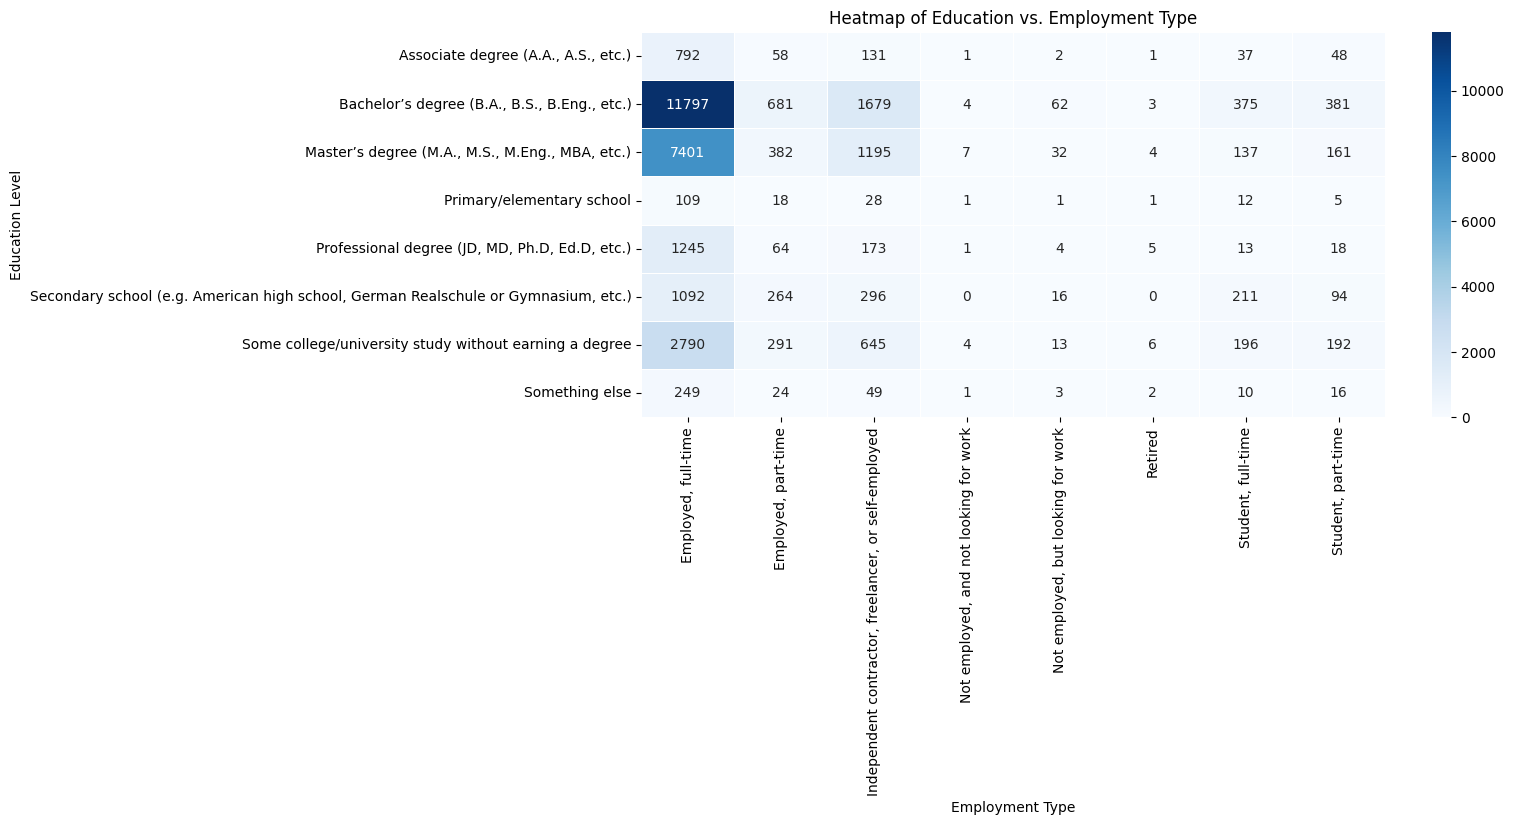

In [73]:
# Heatmap for better visualization
plt.figure(figsize=(12, 5))
sns.heatmap(employment_count, cmap="Blues", linewidths=0.5, annot=True, fmt='d')

plt.xlabel("Employment Type")
plt.ylabel("Education Level")
plt.title("Heatmap of Education vs. Employment Type")

plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
